In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from flask import Flask, jsonify

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement= Base.classes.measurement
Station= Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session (engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
recent_date=(session.query(Measurement.date)
                    .order_by(Measurement.date.desc())
                    .first())
recent_date

('2017-08-23',)

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
oneyeardate=dt.date(2017, 8, 23) - dt.timedelta(days=366)
print('Query Date:', oneyeardate)

# Perform a query to retrieve the data and precipitation scores
precip_year=(session.query(Measurement.date,func.max(Measurement.prcp))
                  .filter(func.strftime('%Y-%m-%d',Measurement.date) > oneyeardate)
                  .group_by(Measurement.date)
                  .all())
precip_year

# Save the query results as a Pandas DataFrame and set the index to the date column
precip_df=pd.DataFrame(precip_year, columns=['Date', 'Precipitation '])
precip_df.set_index('Date',inplace=True)
precip_df.head(10)








Query Date: 2016-08-22


,Precipitation
Date,
2016-08-23,1.79
2016-08-24,2.28
2016-08-25,0.21
2016-08-26,0.04
2016-08-27,0.18
2016-08-28,2.07
2016-08-29,0.90
2016-08-30,0.05
2016-08-31,2.46


In [11]:
# Sort the dataframe by date
precip_df.sort_values('Date')

,Precipitation
Date,
2016-08-23,1.79
2016-08-24,2.28
2016-08-25,0.21
2016-08-26,0.04
2016-08-27,0.18
...,...
2017-08-19,0.09
2017-08-20,0.01
2017-08-21,0.56


Text(0.5, 1.0, 'Precipitaion recorded at all stations in 12 months')

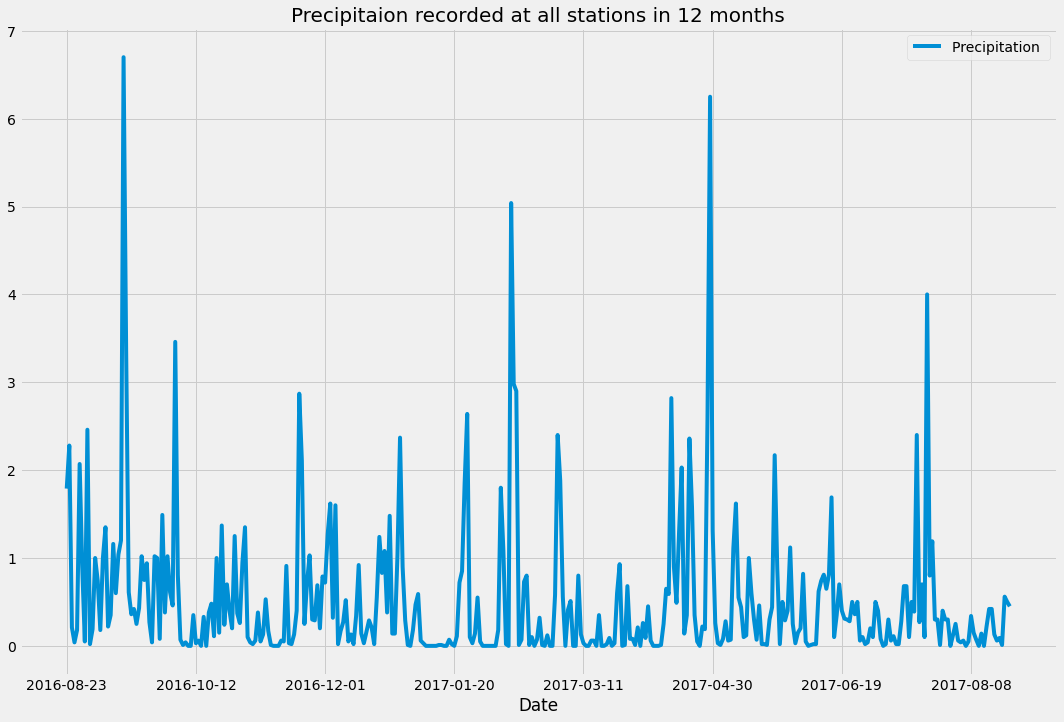

In [12]:
# Use Pandas Plotting with Matplotlib to plot the data
precip_df.plot(figsize=(15,10))
plt.tight_layout()
plt.title("Precipitaion recorded at all stations in 12 months" , size = 20)

In [13]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip_df.describe()

,Precipitation
count,366.000000
mean,0.520765
std,0.830728
min,0.000000
25%,0.040000
50%,0.250000
75%,0.672500
max,6.700000


# Exploratory Station Analysis

In [14]:
# Design a query to calculate the total number stations in the dataset
totalstations=session.query(Station).count()
totalstations

9

In [15]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
activity_stations=(session.query(Measurement.station,func.count(Measurement.station))
                         .group_by(Measurement.station)
                         .order_by(func.count(Measurement.station).desc())
                         .all())
activity_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [17]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
activeresult = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
                filter(Measurement.station == 'USC00519281').order_by(func.min(Measurement.tobs)).all()
activeresult


[(54.0, 85.0, 71.66378066378067)]

In [18]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tempresults =  session.query(Measurement.tobs).\
                          filter(Measurement.station == 'USC00519281' ).\
                          filter(Measurement.date >= '2017,8,23').all()

tempresults

[(72.0,),
 (70.0,),
 (64.0,),
 (63.0,),
 (63.0,),
 (62.0,),
 (70.0,),
 (70.0,),
 (62.0,),
 (62.0,),
 (63.0,),
 (65.0,),
 (69.0,),
 (77.0,),
 (70.0,),
 (74.0,),
 (69.0,),
 (72.0,),
 (71.0,),
 (69.0,),
 (71.0,),
 (71.0,),
 (72.0,),
 (72.0,),
 (69.0,),
 (70.0,),
 (66.0,),
 (65.0,),
 (69.0,),
 (68.0,),
 (68.0,),
 (68.0,),
 (59.0,),
 (60.0,),
 (70.0,),
 (73.0,),
 (75.0,),
 (64.0,),
 (59.0,),
 (59.0,),
 (62.0,),
 (68.0,),
 (70.0,),
 (73.0,),
 (79.0,),
 (75.0,),
 (65.0,),
 (70.0,),
 (74.0,),
 (70.0,),
 (70.0,),
 (71.0,),
 (71.0,),
 (71.0,),
 (69.0,),
 (61.0,),
 (67.0,),
 (65.0,),
 (72.0,),
 (71.0,),
 (73.0,),
 (72.0,),
 (77.0,),
 (73.0,),
 (67.0,),
 (62.0,),
 (64.0,),
 (67.0,),
 (66.0,),
 (81.0,),
 (69.0,),
 (66.0,),
 (67.0,),
 (69.0,),
 (66.0,),
 (68.0,),
 (65.0,),
 (74.0,),
 (69.0,),
 (72.0,),
 (73.0,),
 (72.0,),
 (71.0,),
 (76.0,),
 (77.0,),
 (76.0,),
 (74.0,),
 (68.0,),
 (73.0,),
 (71.0,),
 (74.0,),
 (75.0,),
 (70.0,),
 (67.0,),
 (71.0,),
 (67.0,),
 (74.0,),
 (77.0,),
 (78.0,),
 (67.0,),


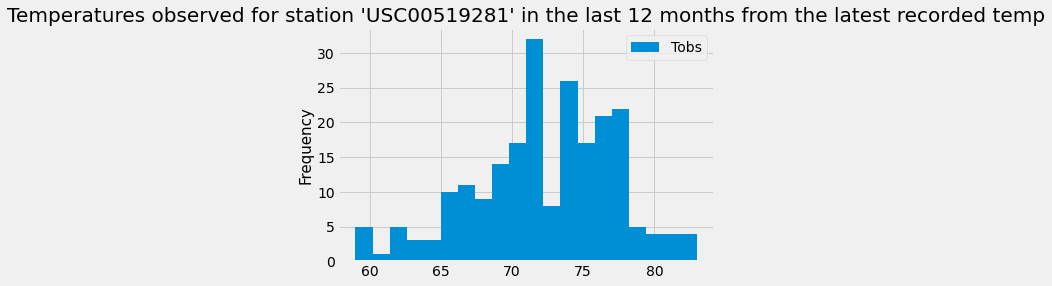

In [24]:
 tempgraph= pd.DataFrame(tempresults , columns = ['Tobs'])


tempgraph.hist( bins = 20)

plt.ylabel("Frequency", fontsize = 15)
plt.title("Temperatures observed for station 'USC00519281' in the last 12 months from the latest recorded temp" ,
           size = 20)
labels = ["Tobs"]
plt.legend(labels)


plt.show()

# Close session

In [ ]:
# Close Session
session.close()